
Count of each class before SMOTE:
Adequate sleep: 407
Inadequate sleep: 45

Count of each class after SMOTE:
Adequate sleep: 407
Inadequate sleep: 407


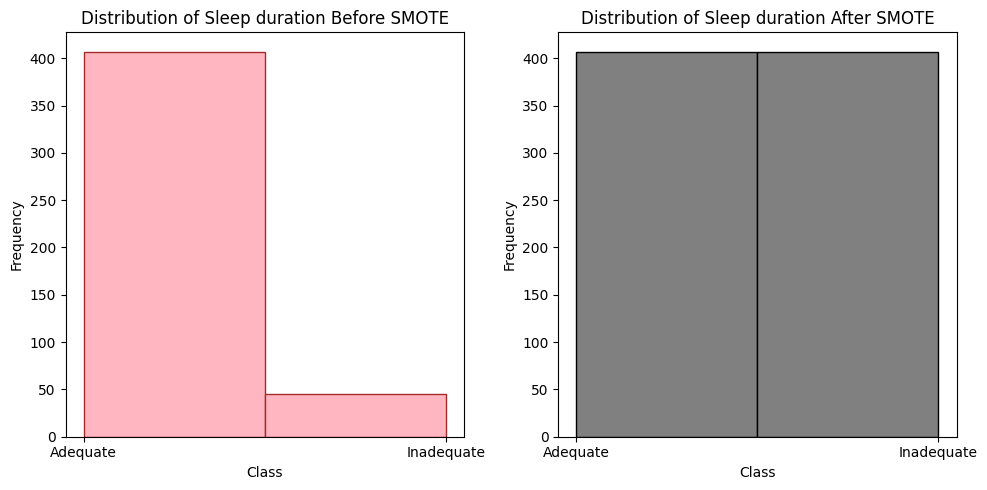

In [ ]:
haimport pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv("/content/Sleep_Efficiency.csv")

# Display the first few rows of the dataset to understand its structure
#print(data.head())

# Assuming 'Sleep duration' is the target variable
y = data['Sleep duration']  # Target variable

# Encoding the target variable
label_encoder = LabelEncoder()
y_binary = y.apply(lambda x: 'Adequate' if x >= 7 else 'Inadequate')
y_encoded = label_encoder.fit_transform(y_binary)

# Count of each class before SMOTE
class_labels = label_encoder.classes_
class_counts_before = pd.Series(y_encoded).value_counts().to_dict()
class_counts_before = {class_labels[i]: class_counts_before[i] for i in range(len(class_labels))}
print("\nCount of each class before SMOTE:")
print("Adequate sleep:", class_counts_before['Adequate'])
print("Inadequate sleep:", class_counts_before['Inadequate'])

# Plot the distribution of the target variable before SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_encoded, bins=2, color='lightpink', edgecolor='brown')
plt.title('Distribution of Sleep duration Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(range(2), label_encoder.classes_)

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(data[['Sleep duration']], y_encoded)

# Convert resampled data back to DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=['Sleep duration'])

# Count of each class after SMOTE
class_counts_after = pd.Series(y_resampled).value_counts().to_dict()
class_counts_after = {class_labels[i]: class_counts_after[i] for i in range(len(class_labels))}
print("\nCount of each class after SMOTE:")
print("Adequate sleep:", class_counts_after['Adequate'])
print("Inadequate sleep:", class_counts_after['Inadequate'])

# Plot the distribution of the target variable after SMOTE
plt.subplot(1, 2, 2)
plt.hist(y_resampled, bins=2, color='grey', edgecolor='black')
plt.title('Distribution of Sleep duration After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(range(2), label_encoder.classes_)

plt.tight_layout()
plt.show()
